# demo_岭回归

In [45]:
import numpy as np
import pandas as pd
import pickle
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
import sklearn.metrics as sm

In [49]:
data = pd.read_csv("Salary_Data2.csv")
x,y = data.loc[:,:'YearsExperience'], data['Salary']
model = lm.Ridge(100, fit_intercept = 'true')
model.fit(x,y)
pred_y = model.predict(x)

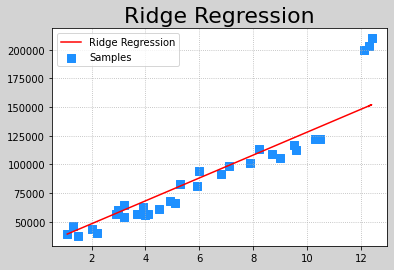

In [50]:
plt.figure('Ridge Regression',facecolor = 'lightgrey')
plt.title('Ridge Regression', fontsize=22)
plt.grid(linestyle = ':')
plt.scatter(x.values.ravel(), y, marker='s',s=50, label='Samples', color = 'dodgerblue')
plt.plot(x.values.ravel(), pred_y, color = 'red', label = 'Ridge Regression')

plt.legend()
plt.show()

In [51]:
test_y = y[:30:4]
test_pred_y = pred_y[:30:4]
mae = sm.mean_absolute_error(test_y, test_pred_y)
mse = sm.mean_squared_error(test_y, test_pred_y)
r2 = sm.r2_score(test_y, test_pred_y)
print(mae, mse, r2)

7252.201666770821 69645339.23015183 0.9171026697534422


In [62]:
#调参 根据测试样本的r2得分，把alpha调整到最佳值
params = np.arange(80, 130, 10)
r2_results = []
for i in params:
    model2 = lm.Ridge(i)
    model2.fit(x, y)
    pred_y = model2.predict(x)
    score = sm.r2_score(y, pred_y)
    r2_results.append(score)
    print('alpha:', i, '  r2:', score)
print(max(r2_results))

alpha: 80   r2: 0.8545948823651447
alpha: 90   r2: 0.8485950595495589
alpha: 100   r2: 0.8423163994763061
alpha: 110   r2: 0.8358096436774259
alpha: 120   r2: 0.8291186778144214
0.8545948823651447
